# SWIGGY DATASET ANALYSIS

![picture](https://upload.wikimedia.org/wikipedia/en/thumb/1/12/Swiggy_logo.svg/220px-Swiggy_logo.svg.png)

Swiggy is an Indian online food ordering and delivery platform. Founded in 2014, Swiggy is headquartered in Bangalore and operates in more than 500 Indian cities as of September 2021. Besides food delivery, the platform also provides on-demand grocery deliveries under the name Instamart, and same-day package delivery service called Swiggy Genie.

It rivals homegrown startup Zomato in food delivery and hyper local marketplace.

More details can be found [here](https://en.wikipedia.org/wiki/Swiggy).

We will be attempting to analyse the dataset for Swiggy.
The steps involved in the process are as below:
* Data Structuring - The json file format is used to get a raw structured csv file which depicts the restaurant's details for a particular subregion in a city
* Data Pre-processing and cleaning - the raw data is filled with many noise and hence our next step is to clean it by changing the data types of relevant columns and dropping unnecessary values.

## Data Structuring

In [1]:
# mount google drive where the dataset has been stored
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import ast
import os
import seaborn as sns

In [3]:
# Following creates a directory, downloads the file and unzips it.
directory_path = 'gdrive/My Drive/GFG_Project_1/swiggy'
if os.path.isdir(directory_path):
    print('Found dataset' )
else:
    os.makedirs(directory_path)

    !gdown 1txOjyBQD9WWYKb1QQXMpZ0Udo2hdI-q9
    !unzip swiggy.zip  -d gdrive/My\ Drive/GFG_Project_1/

Downloading...
From: https://drive.google.com/uc?id=1txOjyBQD9WWYKb1QQXMpZ0Udo2hdI-q9
To: /content/swiggy.zip
100% 135M/135M [00:00<00:00, 174MB/s]
Archive:  swiggy.zip
  inflating: gdrive/My Drive/GFG_Project_1/data.json  


In [4]:
file_path = '/content/gdrive/My Drive/GFG_Project_1/data.json'

# Using a context manager to open and read the file
with open(file_path, 'r') as f:
    data = f.read()

# Now parse the JSON data
parsed_data = json.loads(data)

Now we will analyze the data to check the file structure of parsed_data.

In [5]:
len(parsed_data.keys())

623

In [6]:
parsed_data.keys()

dict_keys(['Abohar', 'Adilabad', 'Adityapur', 'Adoni', 'Agartala', 'Agra', 'Ahmedabad', 'Ahmednagar', 'Aizawl', 'Ajmer', 'Akola', 'Alappuzha', 'Aligarh', 'Alipurduar', 'Allahabad', 'Almora', 'Alwar', 'Amalapuram', 'Ambala', 'Ambikapur', 'Ambur', 'Amravati', 'Amreli', 'Amritsar', 'Anand', 'Anantapur', 'Angul', 'Ankleshwar', 'Arakkonam', 'Arambagh', 'Arrah', 'Aruppukottai', 'Asansol', 'Aurangabad', 'Aurangabad_bihar', 'Azamgarh', 'Baddi', 'Bagalkot', 'Bagdogra', 'Bagula', 'Bahadurgarh', 'Bahraich', 'Balaghat', 'Balangir', 'Balasore', 'Ballari', 'Balrampur', 'Balurghat', 'Banda', 'Bangalore', 'Bankabihar', 'Bankura', 'Bantwal', 'Bapatlachirala', 'Baramati', 'Baran', 'Baraut', 'Bardhaman', 'Bardoli', 'Bareilly', 'Baripada', 'Barmer', 'Barnala', 'Barshi', 'Barwani', 'Basirhat', 'Basti', 'Batala', 'Bathinda', 'Beawar', 'Beed', 'Begusarai', 'Bela-pratapgarh', 'Belgaum', 'Berhampore', 'Berhampur', 'Bettiah', 'Betul', 'Bhadohi', 'Bhadrachalam', 'Bhadrak', 'Bhadravati', 'Bhagalpur', 'Bhandara', 

In [7]:
parsed_data['Abohar'].keys()

dict_keys(['link', 'restaurants'])

In [8]:
parsed_data['Ahmedabad'].keys()

dict_keys(['Vastrapur', 'GOTA', 'Paldi & Ambawadi', 'Ghatlodia', 'Bopal', 'Prahlad Nagar', 'Gandhinagar', 'LalDarwaja', 'Naranpura', 'Navrangpura', 'Science City', 'Maninagar', 'Chandkheda', 'link'])

In [9]:
parsed_data['Ahmedabad']['Bopal'].keys()

dict_keys(['link', 'restaurants'])

In [10]:
len(parsed_data['Ahmedabad']['Bopal'].keys())

2

In [11]:
parsed_data['Ahmedabad']['Bopal']['restaurants'].keys()

dict_keys(['480794', '483945', '65122', '413836', '516955', '561762', '319659', '535591', '549884', '76389', '89339', '191266', '110016', '435853', '334914', '579067', '148894', '205887', '52187', '467594', '385146', '515729', '546367', '544187', '194542', '433440', '492644', '64054', '537998', '579072', '480898', '170344', '503667', '559537', '59820', '282494', '170340', '158474', '146493', '424883', '243905', '525658', '258284', '356504', '390866', '76397', '502561', '310701', '224176', '499378', '327379', '509078', '59958', '91572', '408049', '364382', '578165', '559247', '145693', '228447', '525110', '56338', '146538', '477335', '329788', '433512', '480861', '176064', '571657', '441133', '529602', '145697', '529604', '145695', '552834', '147632', '528998', '513228', '493813', '328308', '491508', '529808', '443111', '524488', '441292', '527876', '328313', '569233', '530913', '263772', '434501', '71631', '433538', '492706', '317664', '564908', '529817', '370953', '529818', '527885', 

In [12]:
parsed_data['Ahmedabad']['Bopal']['restaurants']['483945'].keys()

dict_keys(['name', 'rating', 'rating_count', 'cost', 'address', 'cuisine', 'lic_no', 'menu', 'link'])

* As we can see from the above few code lines that there are two types of cities:
  1. Cities that have no subregion like "Abohar"
  2. Cities that have subregion like "Ahemdabad"

* Another interesting thing to note is that there are some cities like "Almora" which do not have any restaurant listed inside it

* Therefore our csv file is formatted accordingly.

In [13]:
swiggy_data_list = []

for city in parsed_data.keys():
    city_data = parsed_data[city]

    for sub in city_data.keys():
        if len(city_data) > 2:
            sub_data = city_data[sub]

            for place in sub_data.keys():
                if place == 'restaurants':
                    place_data = sub_data[place]

                    for id, v in place_data.items():
                        t = {
                            'city': city,
                            'city_link': city_data['link'],
                            'sub_region': sub,
                            'sub_region_link': sub_data['link'],
                            'id': id,
                            'name': v['name'],
                            'rating': v.get('rating'),
                            'rating_count': v.get('rating_count'),
                            'cost': v.get('cost'),
                            'address': v.get('address'),
                            'cuisine': v.get('cuisine'),
                            'lic_no': v.get('lic_no'),
                            'menu': v.get('menu'),
                            'link': v.get('link')
                        }
                        swiggy_data_list.append(t)

        else:
          if sub == 'restaurants':
            if city_data[sub] != {}:

              sub_data = city_data[sub]

              for id,v in sub_data.items():
                t = {
                  'city': city,
                  'city_link': city_data['link'],
                  'sub_region': city,
                  'sub_region_link': city_data['link'],
                  'id': id,
                  'name': v['name'],
                  'rating': v.get('rating'),
                  'rating_count': v.get('rating_count'),
                  'cost': v.get('cost'),
                  'address': v.get('address'),
                  'cuisine': v.get('cuisine'),
                  'lic_no': v.get('lic_no'),
                  'menu': v.get('menu'),
                  'link': v.get('link')
                }
                swiggy_data_list.append(t)
            else:
              t = {
                  'city': city,
                  'city_link': city_data['link'],
                  'sub_region': city,
                  'sub_region_link': city_data['link'],
                  'id': '',
                  'name': '',
                  'rating': '',
                  'rating_count': '',
                  'cost': '',
                  'address': '',
                  'cuisine': '',
                  'lic_no': '',
                  'menu': '',
                  'link': ''
              }
              swiggy_data_list.append(t)


In [14]:
df = pd.DataFrame(swiggy_data_list)
df.shape

(181470, 14)

In [15]:
df.head()

,city,city_link,sub_region,sub_region_link,id,name,rating,rating_count,cost,address,cuisine,lic_no,menu,link
0,Abohar,https://www.swiggy.com/city/abohar,Abohar,https://www.swiggy.com/city/abohar,567335,AB FOODS POINT,--,Too Few Ratings,₹ 200,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...","Beverages,Pizzas",22122652000138,{'Burger': {'Aloo Tikki Burger': {'price': '40...,https://www.swiggy.com/restaurants/ab-foods-po...
1,Abohar,https://www.swiggy.com/city/abohar,Abohar,https://www.swiggy.com/city/abohar,531342,Janta Sweet House,4.4,50+ ratings,₹ 200,"Janta Sweet House, Bazar No.9, Circullar Road,...","Sweets,Bakery",12117201000112,{'Breakfast': {'Veg Grilled Sandwich': {'price...,https://www.swiggy.com/restaurants/janta-sweet...
2,Abohar,https://www.swiggy.com/city/abohar,Abohar,https://www.swiggy.com/city/abohar,158203,theka coffee desi,3.8,100+ ratings,₹ 100,"theka coffee desi, sahtiya sadan road city",Beverages,22121652000190,{'Recommended': {'Cafe Latte Coffee': {'price'...,https://www.swiggy.com/restaurants/theka-coffe...
3,Abohar,https://www.swiggy.com/city/abohar,Abohar,https://www.swiggy.com/city/abohar,187912,Singh Hut,3.7,20+ ratings,₹ 250,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR","Fast Food,Indian",22119652000167,{'Recommended': {'Malai Chaap': {'price': '200...,https://www.swiggy.com/restaurants/singh-hut-n...
4,Abohar,https://www.swiggy.com/city/abohar,Abohar,https://www.swiggy.com/city/abohar,543530,GRILL MASTERS,--,Too Few Ratings,₹ 250,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...","Italian-American,Fast Food",12122201000053,"{'Veg Burgers': {'Junior': {'price': '65', 've...",https://www.swiggy.com/restaurants/grill-maste...


In [ ]:
###### DO NOT RUN THIS CODE CELL #######

df.to_csv('swiggy.csv', index = False) # to save uncleaned data into csv

## Preprocessing

* Now that our raw structured csv file is ready, it should be pre-processed and cleaned to enable clearer analysis.
* The columns which our problem statement do not require are:
    
    1. city_link
    2. sub_region_link
    3. menu
    4. link

* Aside from this, the columns whose datatypes we need to change are:
  
  1. rating
  2. cost
  3. rating_count

In [16]:
df_swiggy = df.drop(columns = ['city_link','sub_region_link','menu','link'])

In [17]:
df_swiggy['rating'].unique()

array(['--', '4.4', '3.8', '3.7', '3.6', '4.0', '4.2', '4.7', '4.1',
       '3.5', '3.1', '3.4', '3.3', '4.8', '3.9', '2.7', '4.3', '2.9',
       '4.5', '2.5', '3.2', '2.4', '4.6', '3.0', '2.8', '2.3', '5.0',
       '2.6', '2.2', '1.4', '1.9', 'NA', '4.9', '2.1', '1.3', '', '2.0',
       '1.8', '1.6', '1.1', '1.5', '1.0', '1.2', '1.7'], dtype=object)

In [18]:
df_swiggy['cost'].unique()

array(['₹ 200', '₹ 100', '₹ 250', '₹ 150', '₹ 300', '₹ 700', '₹ 650',
       '₹ 400', '₹ 350', '₹ 60', '₹ 110', '₹ 399', '₹ 249', '₹ 500',
       '₹ 99', '₹ 120', '₹ 499', '₹ 299', '₹ 199', '₹ 50', '₹ 180',
       '₹ 349', '₹ 1000', '₹ 599', '₹ 600', '₹ 800', '₹ 450', '₹ 149',
       '₹ 290', '₹ 175', '₹ 125', '₹ 8', '₹ 375', '₹ 275', '₹ 425',
       '₹ 225', '₹ 325', '₹ 75', '₹ 160', '₹ 550', '₹ 220', '₹ 20',
       '₹ 59', '₹ 1200', '₹ 210', '₹ 30', '₹ 310', '₹ 70', '₹ 170',
       '₹ 449', '₹ 280', '₹ 320', '₹ 1300', '₹ 850', '₹ 900', '₹ 40',
       '₹ 1500', '₹ 140', '₹ 1100', '₹ 410', '₹ 80', 'NA', '₹ 10',
       '₹ 1245', '₹ 510', '₹ 90', '₹ 260', '₹ 1800', '₹ 5', '₹ 240',
       '₹ 460', '₹ 1900', '₹ 352', '₹ 298', '₹ 2', '₹ 252', '₹ 330',
       '₹ 750', '₹ 130', '₹ 2000', '₹ 198', '₹ 230', None, '₹ 999',
       '₹ 3999', '₹ 235', '₹ 1600', '₹ 55', '₹ 179', '₹ 129', '₹ 360',
       '₹ 85', '', '₹ 248', '₹ 270', '₹ 25', '₹ 159', '₹ 370', '₹ 1050',
       '₹ 49', '₹ 699', '₹ 301'

In [19]:
df_swiggy['rating_count'].unique()

array(['Too Few Ratings', '50+ ratings', '100+ ratings', '20+ ratings',
       '500+ ratings', '1K+ ratings', 'NA', None, '', '5K+ ratings',
       '10K+ ratings'], dtype=object)

In [20]:
# create conversion function for 'rating'
def convert_rating(rating):
  if rating == '--' or rating == 'NA' or rating =='':
    return np.nan
  else:
    return float(rating)


df_swiggy['rating'] = df_swiggy['rating'].apply(convert_rating)

In [21]:
# create conversion function for 'cost'
def convert_cost(cost):
    if cost is not None:
        parts = cost.split()
        if len(parts) >= 2:
            return int(parts[1])
    return 0


df_swiggy['cost'] = df_swiggy['cost'].apply(convert_cost)

In [22]:
# create conversion function for 'rating_count'
def convert_count(rate):
    list1 = ['', 'Too Few Ratings', None, 'NA']
    if rate in list1:
        return 0
    else:
        rate = rate.replace(',', '')
        if 'K+' in rate:
            rate_value = rate.replace('K+ ratings', '')
            return int(float(rate_value) * 1000)
        else:
            return int(rate.replace('+ ratings', ''))

df_swiggy['rating_count'] = df_swiggy['rating_count'].apply(convert_count)

In [23]:
df_swiggy.head()

,city,sub_region,id,name,rating,rating_count,cost,address,cuisine,lic_no
0,Abohar,Abohar,567335,AB FOODS POINT,NaN,0,200,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...","Beverages,Pizzas",22122652000138
1,Abohar,Abohar,531342,Janta Sweet House,4.4,50,200,"Janta Sweet House, Bazar No.9, Circullar Road,...","Sweets,Bakery",12117201000112
2,Abohar,Abohar,158203,theka coffee desi,3.8,100,100,"theka coffee desi, sahtiya sadan road city",Beverages,22121652000190
3,Abohar,Abohar,187912,Singh Hut,3.7,20,250,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR","Fast Food,Indian",22119652000167
4,Abohar,Abohar,543530,GRILL MASTERS,NaN,0,250,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...","Italian-American,Fast Food",12122201000053


In [24]:
df_swiggy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181470 entries, 0 to 181469
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   city          181470 non-null  object 
 1   sub_region    181470 non-null  object 
 2   id            181470 non-null  object 
 3   name          181470 non-null  object 
 4   rating        76540 non-null   float64
 5   rating_count  181470 non-null  int64  
 6   cost          181470 non-null  int64  
 7   address       155868 non-null  object 
 8   cuisine       155868 non-null  object 
 9   lic_no        155868 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 13.8+ MB


In [25]:
df_swiggy.to_csv('swiggy_clean.csv', index = False)

## Problem Statement:






### 1. How many cities (including subregions) where Swiggy is having its restaurants listed?

* This can be found out easily by getting the unique count of 'sub_region' column of our dataframe

In [26]:
num_cities_reg = df_swiggy['sub_region'].nunique()
print(f'The number of cities (including subregions) where Swiggy is having its restaurants listed are: {num_cities_reg}')

The number of cities (including subregions) where Swiggy is having its restaurants listed are: 904


### 2. How many cities  (don't include subregions) where Swiggy is having their restaurants listed?

* This can be found out easily by getting the unique count of 'city' column of our dataframe

In [27]:
num_cities = df_swiggy['city'].nunique()
print(f'The number of cities cities (without subregions) where Swiggy is having their restaurants listed are: {num_cities}')

The number of cities cities (without subregions) where Swiggy is having their restaurants listed are: 623


### 3. The Subregion of Delhi with the maximum number of restaurants listed on Swiggy?

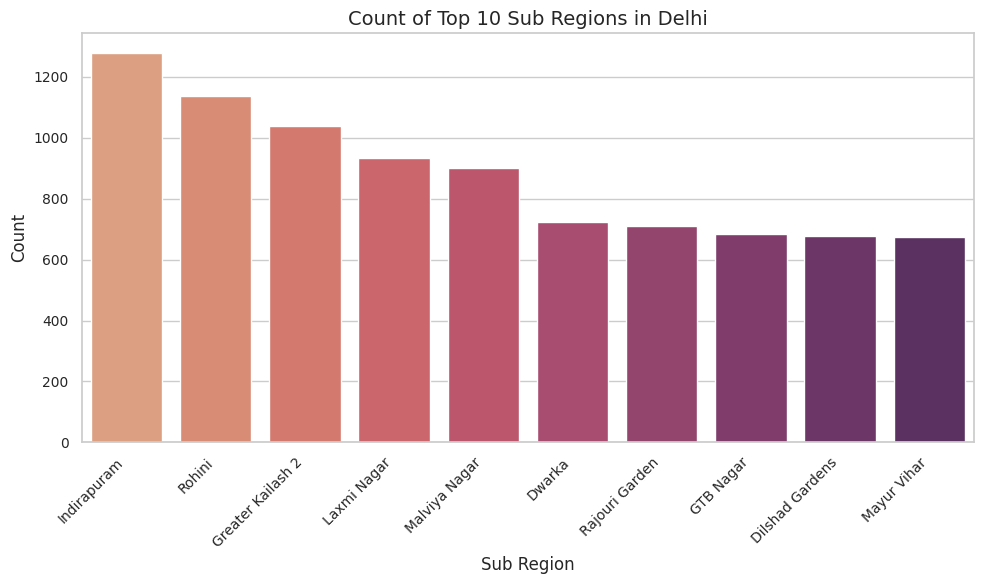

In [28]:
df_delhi = df_swiggy[df_swiggy['city']=='Delhi']
delhi_max_res = df_delhi['sub_region'].value_counts()

sns.set(style='whitegrid')
x_p = delhi_max_res.index.tolist()
y_p = df_delhi['sub_region'].value_counts().tolist()

# Plot value counts as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=x_p[0:10], y=y_p[0:10], palette='flare')
plt.xlabel('Sub Region', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Top 10 Sub Regions in Delhi', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Show plot
plt.show()

In [29]:
print(f'The Subregion of Delhi with the maximum number of restaurants is : {x_p[0]}')
print(f'The maximum number of restaurants listed on Swiggy for the particular region is : {y_p[0]}')

The Subregion of Delhi with the maximum number of restaurants is : Indirapuram
The maximum number of restaurants listed on Swiggy for the particular region is : 1279


### 4. Name the top 5 Most Expensive Cities in the Datasets.

In [30]:
df_swiggy.sort_values(by='cost', ascending=False).head(6)

,city,sub_region,id,name,rating,rating_count,cost,address,cuisine,lic_no
79367,Hinganghat,Hinganghat,477718,KOHINOOR HOTEL,NaN,0,300350,"KOHINOOR HOTEL, LIBOURY CHOWK TAKA GROUND NR-B...","North Indian,Chinese",21521269001428
23215,Bangalore,Electronic City,456114,Oasis restaurant,NaN,0,8000,"Oasis restaurant, Neeladri Road, Karuna Nagar,...","Biryani,North Indian",21221010000753
53107,Dehradun,Hathibarkala,565958,VENOM CLUB AND KITCHEN,NaN,0,6000,"VENOM CLUB AND KITCHEN, 1st & 2nd Floor , 76/5...","Italian,Indian",12621005000488
54069,Delhi,GTB Nagar,524995,Aggarwal sweet india,NaN,0,5023,"Aggarwal sweet india, 199, Stadium Rd, Block A...",Chinese,23320002000105
130170,Mumbai,Vashi,564511,SHAAN RESTAURANT,NaN,0,5000,"SHAAN RESTAURANT, SHOP NO. 1, G SQUARE BUSINES...","Chinese,Indian",11522016000100
6159,Ajmer,Ajmer,579304,Rock N Shawarma Take Away,NaN,0,3999,"Rock N Shawarma Take Away, NEAR HINDUSTAN MACH...",Arabian,22221056000763


* As we can see that for the first entry in above code output cell, restaurant "Hinganghat", it comes out to be ₹300350.
* This could be a an anomaly:
  * maybe it means 300-350 or is a clear mistake in the pricing
  * maybe it is correct quantity

* This could require more investigation about the hotel pricing.

If the price listing is correct and there is no mistake then the 5 most expensive cities are:
1. Hinganghat
2. Bangalore
3. Dehradun
4. Delhi
5. Mumbai

OR

If the cost listing is indeed a mistake in fetching the correct value then the top 5 cities would be:
1. Bangalore
2. Dehradun
3. Delhi
4. Mumbai
5. Ajmer

### 5. List out the top 5 Restaurants with Maximum & minimum ratings throughout the dataset.

In [31]:
df_swiggy.sort_values(by='rating', ascending=False).head(5)

,city,sub_region,id,name,rating,rating_count,cost,address,cuisine,lic_no
66071,Delhi,Rajouri Garden,530061,Mighty Nights,5.0,20,300,"Mighty Nights, BA - 284, near BSES Office, Tag...","Fast Food,Snacks",23322006000713
125167,Mancherial,Mancherial,575591,Tasty Biryani House,5.0,20,150,"Tasty Biryani House, 273/6Maruthi Nagar Road N...",Biryani,23622013000197
153608,Pune,Wagholi,572017,CIRCLE OF CRUST,5.0,20,500,"CIRCLE OF CRUST, G.no 559/1 Shop no 04 Rainbow...","Italian,Desserts",20622003000232
166470,Sirsa,Sirsa,342903,House of Tandoori,5.0,20,300,"House of Tandoori, Shop NO 02 GF at 786 comple...","North Indian,Mughlai",20820005003918
46815,Chennai,Villivakkam,570609,CHINESE CARNIVAL,5.0,20,300,"CHINESE CARNIVAL, NO.8/64, ASATH STREET, 35TH ...","Chinese,Beverages",22421535000919


In [32]:
rest_1 = df_swiggy.sort_values(by='rating', ascending=False)['name'].iloc[0]
rest_2 = df_swiggy.sort_values(by='rating', ascending=False)['name'].iloc[1]
rest_3 = df_swiggy.sort_values(by='rating', ascending=False)['name'].iloc[2]
rest_4 = df_swiggy.sort_values(by='rating', ascending=False)['name'].iloc[3]
rest_5 = df_swiggy.sort_values(by='rating', ascending=False)['name'].iloc[4]

print(f'The top 5 Restaurants with Maximum rating are:')
print(f'1. {rest_1}')
print(f'2. {rest_2}')
print(f'3. {rest_3}')
print(f'4. {rest_4}')
print(f'5. {rest_5}')

The top 5 Restaurants with Maximum rating are:
1. Mighty Nights
2. Tasty Biryani House
3. CIRCLE OF CRUST
4. House of Tandoori
5. CHINESE CARNIVAL


In [33]:
df_swiggy.sort_values(by='rating', ascending=True).head(5)

,city,sub_region,id,name,rating,rating_count,cost,address,cuisine,lic_no
36955,Chandigarh,South Chd,392000,Ice Cream and Shakes Co,1.0,20,200,"Ice Cream and Shakes Co, Plot No. 632, Industr...","Beverages,Desserts",22122676000410
19756,Bangalore,"Sanjay Nagar, New BEL Road",359391,Persian Delight,1.1,20,250,"Persian Delight, 315, 11th Cross Road, Gokula ...",Indian,21221180000204
40038,Chennai,Urapakkam,471181,SHAWARMA WRAP - ROLL YOUR SECRETS,1.2,50,250,"SHAWARMA WRAP - ROLL YOUR SECRETS, NEW NO 10, ...","Arabian,Snacks",22421076000329
177132,Varanasi,Varanasi,438989,Champaran Mutton Hundy & Biryani,1.2,20,300,"Champaran Mutton Hundy & Biryani, ""38/56 69 B ...",Indian,22721646000067
75219,Gurgaon,Old Gurgaon (Zone 6),494551,The Hyderabadi Biryani House,1.2,20,300,"The Hyderabadi Biryani House, SECTOR 24 U BLOC...",Biryani,20821005003479


In [34]:
res_1 = df_swiggy.sort_values(by='rating', ascending=True)['name'].iloc[0]
res_2 = df_swiggy.sort_values(by='rating', ascending=True)['name'].iloc[1]
res_3 = df_swiggy.sort_values(by='rating', ascending=True)['name'].iloc[2]
res_4 = df_swiggy.sort_values(by='rating', ascending=True)['name'].iloc[3]
res_5 = df_swiggy.sort_values(by='rating', ascending=True)['name'].iloc[4]

print(f'The top 5 Restaurants with Minimum rating are:')
print(f'1. {res_1}')
print(f'2. {res_2}')
print(f'3. {res_3}')
print(f'4. {res_4}')
print(f'5. {res_5}')

The top 5 Restaurants with Minimum rating are:
1. Ice Cream and Shakes Co
2. Persian Delight
3. SHAWARMA WRAP - ROLL YOUR SECRETS
4. Champaran Mutton Hundy & Biryani
5. The Hyderabadi Biryani House


### 6. Name of top 5 cities with the highest number of restaurants listed.

* To solve this problem, we need to filter the dataset such that it contains only listed restaurants.
* One way to do it is by using 'lic_no', since all listed restaurants will have a license number for them

In [35]:
df_listed = df_swiggy[df_swiggy['lic_no'] != None]

In [36]:
df_listed['city'].value_counts()[0:5]

Bangalore    16701
Delhi        14386
Pune         13145
Hyderabad    12439
Chennai      10987
Name: city, dtype: int64

In [37]:
print(f'The top 5 cities with highest number of listed restaurants are:')
print(f"1. {df_listed['city'].value_counts().index[0]} with {df_listed['city'].value_counts()[0]} restaurants")
print(f"2. {df_listed['city'].value_counts().index[1]} with {df_listed['city'].value_counts()[1]} restaurants")
print(f"3. {df_listed['city'].value_counts().index[2]} with {df_listed['city'].value_counts()[2]} restaurants")
print(f"4. {df_listed['city'].value_counts().index[3]} with {df_listed['city'].value_counts()[3]} restaurants")
print(f"5. {df_listed['city'].value_counts().index[4]} with {df_listed['city'].value_counts()[4]} restaurants")

The top 5 cities with highest number of listed restaurants are:
1. Bangalore with 16701 restaurants
2. Delhi with 14386 restaurants
3. Pune with 13145 restaurants
4. Hyderabad with 12439 restaurants
5. Chennai with 10987 restaurants


### 7. Top 10 cities as per the number of restaurants listed?


In [38]:
df_listed['city'].value_counts()[0:10]

Bangalore    16701
Delhi        14386
Pune         13145
Hyderabad    12439
Chennai      10987
Kolkata       9651
Mumbai        7221
Jaipur        6250
Ahmedabad     4736
Gurgaon       4106
Name: city, dtype: int64

In [39]:
print(f'The top 10 cities with highest number of listed restaurants are:')
print(f"1. {df_listed['city'].value_counts().index[0]} with {df_listed['city'].value_counts()[0]} restaurants")
print(f"2. {df_listed['city'].value_counts().index[1]} with {df_listed['city'].value_counts()[1]} restaurants")
print(f"3. {df_listed['city'].value_counts().index[2]} with {df_listed['city'].value_counts()[2]} restaurants")
print(f"4. {df_listed['city'].value_counts().index[3]} with {df_listed['city'].value_counts()[3]} restaurants")
print(f"5. {df_listed['city'].value_counts().index[4]} with {df_listed['city'].value_counts()[4]} restaurants")
print(f"6. {df_listed['city'].value_counts().index[5]} with {df_listed['city'].value_counts()[5]} restaurants")
print(f"7. {df_listed['city'].value_counts().index[6]} with {df_listed['city'].value_counts()[6]} restaurants")
print(f"8. {df_listed['city'].value_counts().index[7]} with {df_listed['city'].value_counts()[7]} restaurants")
print(f"9. {df_listed['city'].value_counts().index[8]} with {df_listed['city'].value_counts()[8]} restaurants")
print(f"10. {df_listed['city'].value_counts().index[9]} with {df_listed['city'].value_counts()[9]} restaurants")

The top 10 cities with highest number of listed restaurants are:
1. Bangalore with 16701 restaurants
2. Delhi with 14386 restaurants
3. Pune with 13145 restaurants
4. Hyderabad with 12439 restaurants
5. Chennai with 10987 restaurants
6. Kolkata with 9651 restaurants
7. Mumbai with 7221 restaurants
8. Jaipur with 6250 restaurants
9. Ahmedabad with 4736 restaurants
10. Gurgaon with 4106 restaurants


### 8. Name the top 5 Most Popular Restaurants in Pune.


In [40]:
df_pune = df_swiggy[df_swiggy['city']=='Pune']
df_pune.sort_values(by='rating', ascending=False).head(6)

,city,sub_region,id,name,rating,rating_count,cost,address,cuisine,lic_no
158201,Pune,Baner,558828,HRX by Eatfit,5.0,20,270,"HRX by Eatfit, Survey No 22/9/25+22/10A/19,22/...","Healthy Food,Salads",11522036000324
156399,Pune,Kalyani Nagar,556079,Kushta by Semporo,5.0,20,800,"Kushta by Semporo, PLOT NO . 398 ROW HOUSE NO ...","North Indian,Mughlai",21522035000256
154163,Pune,Hinjewadi,534521,Smoodies & Juices: Your Fruitfully,5.0,20,140,"Smoodies & Juices: Your Fruitfully, Plot 46/47...","Beverages,Snacks",license
159230,Pune,link,533842,The Samosa Man,5.0,0,0,None,None,None
148129,Pune,Kothrud,558835,HRX by Eatfit,5.0,20,270,"HRX by Eatfit, Sai Sayaji Building Second Floo...","Healthy Food,Salads",license
155239,Pune,Viman Nagar,558838,HRX by Eatfit,5.0,20,270,"HRX by Eatfit, SHOP NO G-49/G-50 GROUND FLOOR ...","Healthy Food,Salads",11522034000317


In [41]:
p_res_1 = df_pune.sort_values(by='rating', ascending=False)['name'].iloc[0]
p_res_2 = df_pune.sort_values(by='rating', ascending=False)['name'].iloc[1]
p_res_3 = df_pune.sort_values(by='rating', ascending=False)['name'].iloc[2]
p_res_4 = df_pune.sort_values(by='rating', ascending=False)['name'].iloc[3]
p_res_5 = df_pune.sort_values(by='rating', ascending=False)['name'].iloc[4]

print(f'The top 5 Most Popular Restaurants in Pune are:')
print(f'1. {p_res_1}')
print(f'2. {p_res_2}')
print(f'3. {p_res_3}')
print(f'4. {p_res_4}')
print(f'5. {p_res_5}')

The top 5 Most Popular Restaurants in Pune are:
1. HRX by Eatfit
2. Kushta by Semporo
3. Smoodies & Juices: Your Fruitfully
4. The Samosa Man
5. HRX by Eatfit


### 9. Which SubRegion in Delhi is having the least expensive restaurant in terms of cost?


In [42]:
df_delhi[df_delhi['cost'] != 0].sort_values(by='cost', ascending=True).head(5)

,city,sub_region,id,name,rating,rating_count,cost,address,cuisine,lic_no
60657,Delhi,Dilshad Gardens,573581,AL MADINA FOODS,NaN,0,1,"AL MADINA FOODS, N-60 sunder nagri delhi- 1100...",North Indian,23320004000038
63175,Delhi,Lajpat Nagar,577285,SVD BIKANER SWEETS,NaN,0,1,"SVD BIKANER SWEETS, K-2 , Mahatma Gandhi Marg,...","Snacks,Fast Food",23322010001561
61989,Delhi,Rohini,571723,Chinese Testy Hut,NaN,0,2,"Chinese Testy Hut, G-18/48 , SHOP NO.- 3, SEC-...","Chinese,North Indian",23322001000517
67442,Delhi,Malviya Nagar,469415,Sharma ji ke paneer wale chhole bhature,NaN,0,2,"Sharma ji ke paneer wale chhole bhature, Lal g...","North Indian,Beverages",23321002003042
63794,Delhi,Kirti Nagar,561497,Night parindey,NaN,0,2,"Night parindey, B195, near Hari Mandir, Block ...","Snacks,Fast Food",23320006001301


### 10. Top 5 most popular restaurant chains in India?


In [43]:
df_swiggy['name'].value_counts()[0:5]

Domino's Pizza                                     481
Pizza Hut                                          364
KFC                                                352
Kwality Walls Frozen Dessert and Ice Cream Shop    333
Baskin Robbins                                     321
Name: name, dtype: int64

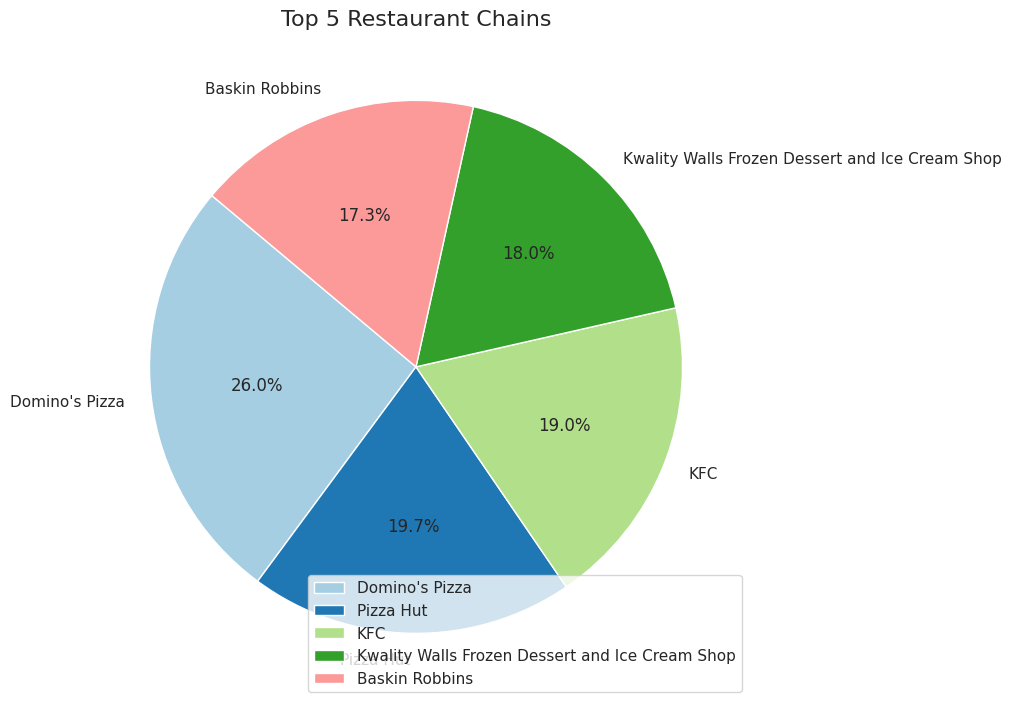

In [44]:
df_swiggy['name'].value_counts()[0:5].plot(kind='pie', figsize=(10, 20), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title('Top 5 Restaurant Chains', fontsize=16)
plt.ylabel('')
plt.legend(df_swiggy['name'].value_counts()[0:5].index, loc='lower right')
plt.tight_layout()
plt.show()

### 11. Which restaurant in Pune has the most number of people visiting?


In [45]:
df_pune.sort_values(by=['rating_count','rating'], ascending=False).head(6)

,city,sub_region,id,name,rating,rating_count,cost,address,cuisine,lic_no
148761,Pune,Kothrud,42906,Sheetal Restaurant,4.5,1000,400,"Sheetal Restaurant, 147 & 16/17, Charudatta Ap...","North Indian,South Indian",11516034000781
151105,Pune,Kondhwa,238148,Theobroma,4.5,1000,800,"Theobroma, Shop 54, Ground Floor, Grime Height...","Desserts,Bakery",11519035000911
155860,Pune,Viman Nagar,12450,Irani Cafe,4.5,1000,250,"Irani Cafe, Shop 3,Opposite Rosary school,Vima...","Beverages,Bakery",11517034000427
158640,Pune,Magarpatta,180419,Kalika Dairy & Sweets,4.5,1000,200,"Kalika Dairy & Sweets, S NO 151/21/2, MAGARPAT...","Sweets,Snacks",11517036000657
147617,Pune,Pimple Saudagar,25845,Fun Food-Taste of Indore,4.4,1000,100,"Fun Food-Taste of Indore, Shop 7, Dwarka Lords...","Chaat,Snacks",11517037001094
148401,Pune,Kothrud,106033,Potoba,4.4,1000,300,"Potoba, Arundhati Building, Opposite Pratidnya...","Maharashtrian,North Indian",11519034000321


### 12. Top 10 Restaurants with Maximum Ratings in Banglore


In [46]:
df_bangalore = df_swiggy[df_swiggy['city']=='Bangalore']

In [47]:
df_bangalore[['city', 'sub_region','rating','name']].sort_values(by='rating', ascending=False).head(10)

,city,sub_region,rating,name
26754,Bangalore,link,5.0,SHAWARMA INDIAH
20784,Bangalore,R.T. Nagar,5.0,BigBites
17781,Bangalore,BTM,5.0,Joao's Croissant Fusion
17803,Bangalore,BTM,5.0,Hot Chillies Fast Food
17811,Bangalore,BTM,5.0,PEDRO DE GOA
14739,Bangalore,Indiranagar,5.0,Mamaji PavBhaji
18069,Bangalore,BTM,5.0,ESCOBAR PANINI s
18074,Bangalore,BTM,5.0,Mels SubHub
18254,Bangalore,BTM,5.0,HRX by Eatfit
14646,Bangalore,Indiranagar,5.0,The Lassi Pub


In [48]:
print(f'The Top 10 Restaurants with Maximum Ratings in Bangalore are:')
print(f"1. {df_bangalore.sort_values(by='rating', ascending=False)['name'].iloc[0]}")
print(f"2. {df_bangalore.sort_values(by='rating', ascending=False)['name'].iloc[1]} ")
print(f"3. {df_bangalore.sort_values(by='rating', ascending=False)['name'].iloc[2]} ")
print(f"4. {df_bangalore.sort_values(by='rating', ascending=False)['name'].iloc[3]} ")
print(f"5. {df_bangalore.sort_values(by='rating', ascending=False)['name'].iloc[4]} ")
print(f"6. {df_bangalore.sort_values(by='rating', ascending=False)['name'].iloc[5]} ")
print(f"7. {df_bangalore.sort_values(by='rating', ascending=False)['name'].iloc[6]} ")
print(f"8. {df_bangalore.sort_values(by='rating', ascending=False)['name'].iloc[7]} ")
print(f"9. {df_bangalore.sort_values(by='rating', ascending=False)['name'].iloc[8]} ")
print(f"10. {df_bangalore.sort_values(by='rating', ascending=False)['name'].iloc[9]} ")

The Top 10 Restaurants with Maximum Ratings in Bangalore are:
1. SHAWARMA INDIAH
2. BigBites 
3. Joao's Croissant Fusion 
4. Hot Chillies Fast  Food 
5. PEDRO DE GOA 
6. Mamaji PavBhaji 
7. ESCOBAR PANINI s 
8. Mels SubHub 
9. HRX by Eatfit 
10. The Lassi Pub 


### 13. Top 10 Restaurant in Patna w.r.t rating

In [49]:
df_patna = df_swiggy[df_swiggy['city']=='Patna']
df_patna[['city', 'sub_region','rating','name']].sort_values(by='rating', ascending=False).head(10)

,city,sub_region,rating,name
145106,Patna,Patna,4.6,Kwality Walls Frozen Dessert and Ice Cream Shop
145306,Patna,Patna,4.6,Slurpy Shakes
145340,Patna,Patna,4.5,Cupcake Bliss Cake & Desserts
145363,Patna,Patna,4.5,Burger It Up
145294,Patna,Patna,4.5,Kouzina Kafe The Food Court
145595,Patna,Patna,4.5,GARAGE KITCHEN
145323,Patna,Patna,4.4,The Dessert Zone
145372,Patna,Patna,4.4,Pure Veg Meals by Lunchbox
145549,Patna,Patna,4.4,KINGDOM OF MOMOS
145312,Patna,Patna,4.4,Indiana Burgers


In [50]:
print(f'The Top 10 Restaurants with Maximum Ratings in Patna are:')
print(f"1. {df_patna.sort_values(by='rating', ascending=False)['name'].iloc[0]}")
print(f"2. {df_patna.sort_values(by='rating', ascending=False)['name'].iloc[1]} ")
print(f"3. {df_patna.sort_values(by='rating', ascending=False)['name'].iloc[2]} ")
print(f"4. {df_patna.sort_values(by='rating', ascending=False)['name'].iloc[3]} ")
print(f"5. {df_patna.sort_values(by='rating', ascending=False)['name'].iloc[4]} ")
print(f"6. {df_patna.sort_values(by='rating', ascending=False)['name'].iloc[5]} ")
print(f"7. {df_patna.sort_values(by='rating', ascending=False)['name'].iloc[6]} ")
print(f"8. {df_patna.sort_values(by='rating', ascending=False)['name'].iloc[7]} ")
print(f"9. {df_patna.sort_values(by='rating', ascending=False)['name'].iloc[8]} ")
print(f"10. {df_patna.sort_values(by='rating', ascending=False)['name'].iloc[9]} ")

The Top 10 Restaurants with Maximum Ratings in Patna are:
1. Kwality Walls Frozen Dessert and Ice Cream Shop
2. Slurpy Shakes 
3. Cupcake Bliss Cake & Desserts 
4. Burger It Up 
5. Kouzina Kafe The Food Court 
6. GARAGE KITCHEN 
7. The Dessert Zone 
8. Pure Veg Meals by Lunchbox 
9. KINGDOM OF MOMOS 
10. Indiana Burgers 
